# Tarea 177 - Identificación, tratamiento y manejo de Missing Values

Partiendo del dataset "ejercicio_Missing_Values.xlsx" se debe obtener un set de datos analizable.

Para ello, hay que utilizar las diferentes estrategias de manejo de Missing Values que se han aprendido durante la tarea y que están resumidas en el diccionario disponible en mi repositorio de Github.

Para empezar, leemos el archivo Excel con el que trabajaremos y lo guardamos en la variable "df".

In [1]:
import pandas as pd

df = pd.read_excel('ejercicio_Missing_Values.xlsx')
df

,Nombre,Apellido 1,Apellido 2,Sexo,Municipio,Provincia,NIF,Edad,Estatura,Masa,Hijos,Ingresos,Estado Civil,Vacunadx,CARNÉ CONDUCIR,Consumidorx Alcohol Esporádico,REFERENCIA ESTUDIO
0,José,Maza,Redondo,H,Madrid,Madrid,61025400Y,22.0,156.0,60.0,NO,1000.0,Solter/x,SI,SÍ,SÍ,4411125322A
1,Ana Belén,Carrasco,Dimitrova,M,Zaragoza,Zaragoza,73534066F,22.0,160.0,65.0,NO,1200.0,Solter/x,SI,NaN,NaN,4411125322A
2,Pablo,Gálvez,González,H,Talavera de la Reina,Toledo,10223810K,23.0,177.0,70.0,NO,1325.0,Casad/x,SI,SÍ,SÍ,4411125322A
3,María,Gallego,Martínez,M,Sevilla,Sevilla,32770305C,45.0,172.0,89.0,NO,1500.0,Solter/x,No,NO,SÍ,4411125322A
4,José Luis,Fernández,Ortega,H,Oviedo,Asturias,04614346V,37.0,179.0,82.0,SÍ,1662.5,Solter/x,No,NO,SÍ,4411125322A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Juan Manuel,Sendra,Rubio,H,Valencia,Valencia,39455398W,1.0,78.0,10.0,SÍ,NaN,NaN,NO,NO,NaN,4411125322A
65,Ángel,Castro,Guisado,H,Torrejón de Ardoz,Madrid,33261507M,2.0,86.0,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN
66,Antonio,Elizalde,Martin,H,Colmenar Viejo,Madrid,39455398W,8.0,125.0,25.0,NO,0.0,Solter/x,SI,NO,NaN,4411125322A
67,Ángel,Guerrero,Alonso,H,Puertollano,Ciudad Real,60423158L,9.0,135.0,30.0,SÍ,0.0,Solter/x,SI,NO,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nombre                          67 non-null     object 
 1   Apellido 1                      67 non-null     object 
 2   Apellido 2                      67 non-null     object 
 3   Sexo                            67 non-null     object 
 4   Municipio                       64 non-null     object 
 5   Provincia                       65 non-null     object 
 6   NIF                             58 non-null     object 
 7   Edad                            67 non-null     float64
 8   Estatura                        57 non-null     float64
 9   Masa                            56 non-null     float64
 10  Hijos                           63 non-null     object 
 11  Ingresos                        62 non-null     float64
 12  Estado Civil                    61 non

In [3]:
print(df.isna().sum())

perc_nulls = (df.isna().sum()/len(df))*100
print(perc_nulls)

Nombre                             2
Apellido 1                         2
Apellido 2                         2
Sexo                               2
Municipio                          5
Provincia                          4
NIF                               11
Edad                               2
Estatura                          12
Masa                              13
Hijos                              6
Ingresos                           7
Estado Civil                       8
Vacunadx                           5
CARNÉ CONDUCIR                    10
Consumidorx Alcohol Esporádico    43
REFERENCIA ESTUDIO                 5
dtype: int64
Nombre                             2.898551
Apellido 1                         2.898551
Apellido 2                         2.898551
Sexo                               2.898551
Municipio                          7.246377
Provincia                          5.797101
NIF                               15.942029
Edad                               2.898551
Estatu

<AxesSubplot:>

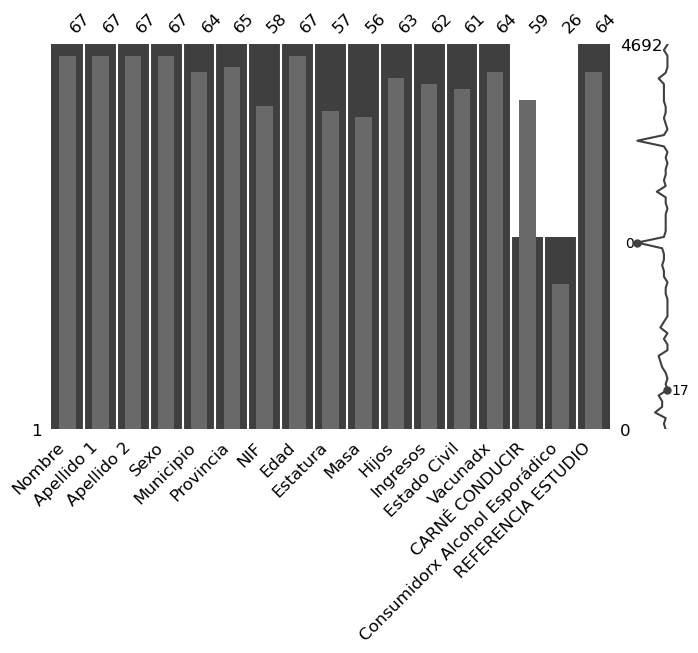

In [4]:
import missingno as msno

msno.matrix(df, figsize=(8, 5), fontsize=12)
msno.bar(df, figsize=(8, 5), fontsize=12)


Una vez analizado como está el dataset y donde están los valores nulos, se procede a seguir las estrategias de Missing Values aprendidas en la tarea para eliminarlas y tener un conjunto de datos listo para ser explotado.

In [5]:
# Eliminar filas 17 y 35, que son nulas en todas sus columnas.
df = df.drop([6, 17, 35])

# Eliminamos la columna NIF, que contiene bastantes nulos y no aporta nada al posterior analisis.
del df['NIF']

Eliminados las filas y columnas que no aportan nada, el siguiente paso ha sido ir columna a columna identificando cada caso 
y eliminando los missing values. Se ha empezado desde la derecha, con la columna "REFERENCIA ESTUDIO".

In [6]:
# REFERENCIA ESTUDIO
# Rellenamos las referencias de estudio nulas con el código de todo el dataset.
df["REFERENCIA ESTUDIO"] = df["REFERENCIA ESTUDIO"][0]

In [7]:
# CONSUMIDORX ALCOHOL ESPORÁDICO
# Todos los nulos en la columna de consumidores de alcohol serán 'NO' (enunciado).
df.loc[pd.isnull(df['Consumidorx Alcohol Esporádico']),
       'Consumidorx Alcohol Esporádico'] = 'NO'

In [8]:
# CARNÉ CONDUCIR
# Si la persona es <18, no tiene carné. Si >=18, si tiene.
df.loc[(pd.isnull(df['CARNÉ CONDUCIR']) & (df['Edad'] < 18)),
       'CARNÉ CONDUCIR'] = 'NO'
df.loc[pd.isnull(df['CARNÉ CONDUCIR']), 'CARNÉ CONDUCIR'] = 'NO'

In [9]:
# VACUNADX
# Las vacunas no pueden administrarse a personas menores de 5 años.
df.loc[(pd.isnull(df['Vacunadx']) & (df['Edad'] < 5)),
       'Vacunadx'] = 'No'

In [10]:
# ESTADO CIVIL
# Todos los nulos son menores de 18, se asigna estado "Solter/x".
df.loc[(pd.isnull(df['Estado Civil']) & (df['Edad'] < 18)),
       'Estado Civil'] = 'Solter/x'

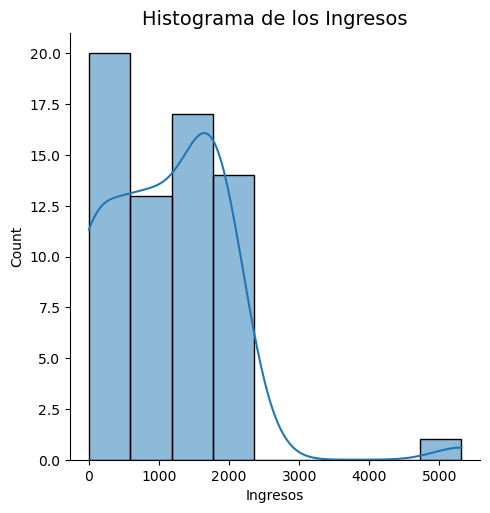

In [11]:
# INGRESOS
import seaborn as sns
import matplotlib.pyplot as plt

# Para personas menores de 16 años los ingresos serán de 0€.
df.loc[(pd.isnull(df['Ingresos']) & (df['Edad'] < 16)),
       'Ingresos'] = 0
# Seguimos teniendo un valor nulo en la columna "Ingresos".
sns.displot(df.Ingresos, kde=True)
plt.title('Histograma de los Ingresos', fontsize=14)
plt.show()
# Al ser un único valor, se decide sustituirlo por la media de los ingresos.
# Para el cálculo de la media se han eliminado todas los filas que sean 0€.
df["Ingresos"] = df["Ingresos"].fillna(df.loc[df['Ingresos'] > 0,
                                              'Ingresos'].mean())

In [12]:
# HIJOS
# Consideramos que una persona menor de 16 no tiene hijos.
df.loc[(pd.isnull(df['Hijos']) & (df['Edad'] < 16)),
       'Hijos'] = 'NO'

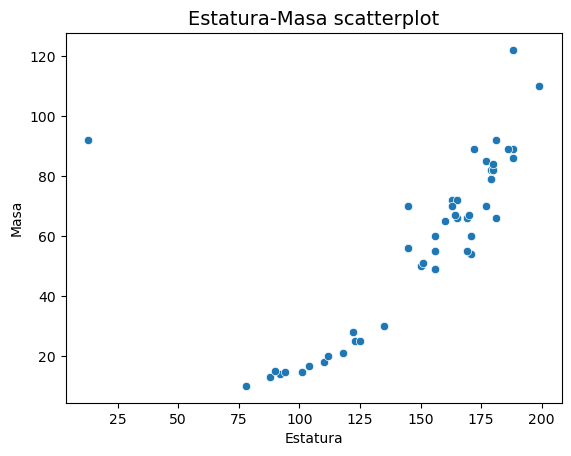

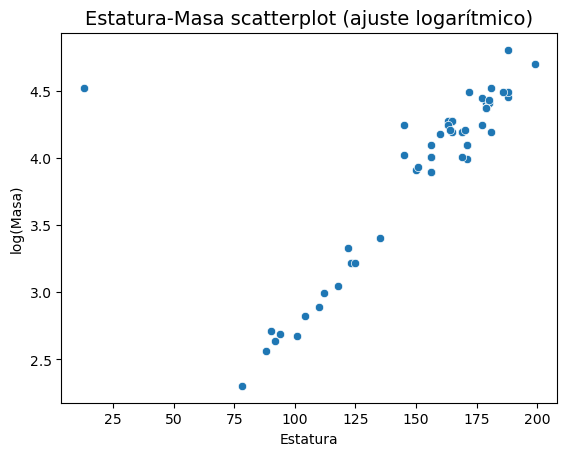

In [13]:
# ESTATURA Y MASA
import numpy as np
# En este caso hay muchas filas donde faltan los dos valores o uno de ellos.
# Primero se va a analizar si mantiene algún tipo de correlación con el resto de columnas.
sns.scatterplot(data=df, x=df.Estatura, y=df.Masa)
plt.title('Estatura-Masa scatterplot', fontsize=14)
plt.show()
# Como se ve hay una correlación (exponencial) entre estatura y masa.
# Si se aplica un ajuste logarítmico se convierte en lineal.
sns.scatterplot(data=df, x=df.Estatura, y=np.log(df.Masa))
plt.title('Estatura-Masa scatterplot (ajuste logarítmico)', fontsize=14)
plt.ylabel('log(Masa)')
plt.show()

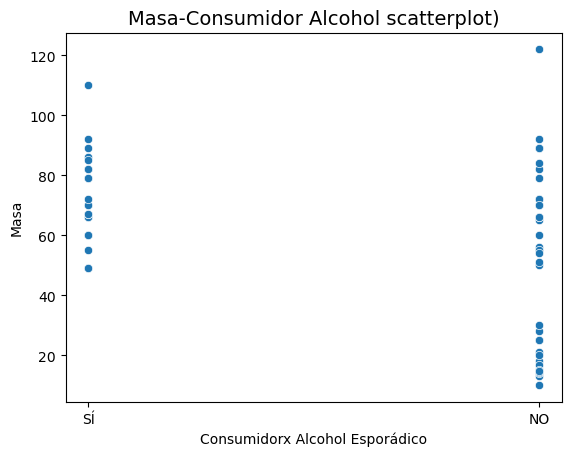

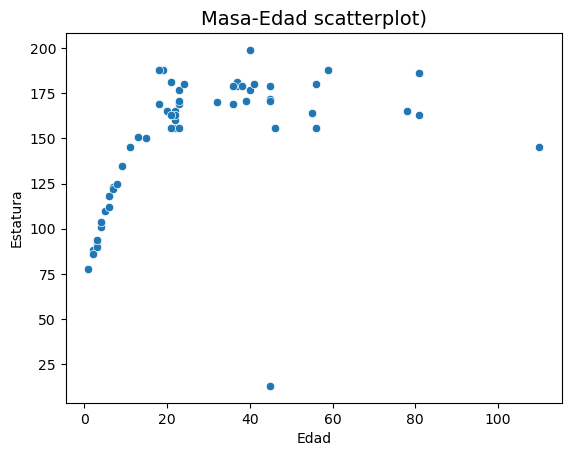

In [14]:
sns.scatterplot(data=df, y=df['Masa'], x=df['Consumidorx Alcohol Esporádico'])
plt.title('Masa-Consumidor Alcohol scatterplot)', fontsize=14)
plt.show()

sns.scatterplot(data=df, y=df['Estatura'], x=df['Edad'])
plt.title('Masa-Edad scatterplot)', fontsize=14)
plt.show()

🔵 No hay correlación entre consumidor de alcohol y masa (solo en niños).
En la relación masa-edad, en la juventud la relación es lineal, pero luego
a partir de los 20 años la distribución es normal. Por lo tanto, como en este
caso todos los valores faltantes son para mayores de 20 años se cojera le media
de altura o masa de adultos y se introducirá en la recta de la regresión para
sacar el valor faltante.

🔵 Por lo tanto, y teniendo como única relación la correlación exponencial entre 
masa y altura, como en este caso todos los valores faltantes son para mayores 
de 20 años se cojera le media de altura o masa de adultos y se introducirá en 
**la recta de la regresión que se estimará a continuación.**

Coefficients: 
 [0.02029463]
Independent term: 
 0.7852861827661921
Mean squared error: 0.02
Variance score: 0.95


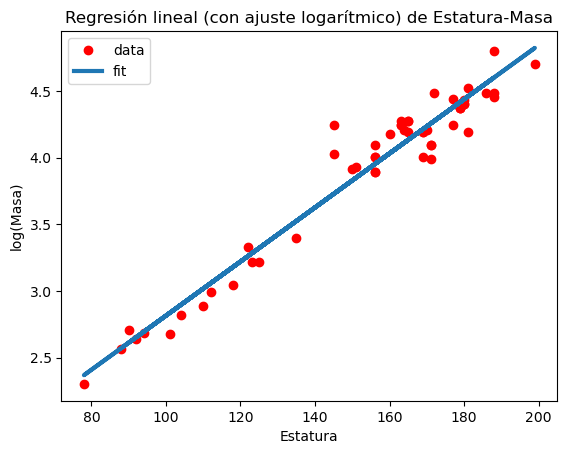

In [15]:
# Realizamos la regresión entre estatura y masa.

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Eliminamos las filas nulas para poder hacer la regresión.
df_estmasa = df[['Estatura', 'Masa']].dropna()
# Eliminamos la fila 28 como valor atípico.
df_estmasa = df_estmasa.drop([28])
# Realizamos la regresión lineal usando un ajuste logarítmico.
regr = linear_model.LinearRegression()
x = np.array(df_estmasa.Estatura).reshape(-1, 1)
lny = np.array(np.log(df_estmasa.Masa))
regr.fit(x, lny)
y_pred = regr.predict(x)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)
# y = mx + b // y = regr.coef_*x+regr.intercept_
print("Mean squared error: %.2f" % mean_squared_error(lny, y_pred))
print('Variance score: %.2f' % r2_score(lny, y_pred))
# Graficamos la regresión lineal construida junto con los valores reales.
plt.plot(x, lny, 'ro', label='data')
plt.plot(x, y_pred, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('log(Masa)')
plt.xlabel('Estatura')
plt.title('Regresión lineal (con ajuste logarítmico) de Estatura-Masa')
plt.show()

🛑 **Como se observa en los resultados finales del modelo, el error cuadrático es mínimo y la varianza se acerca al 1, validando que el modelo de regresión lineal se ajusta correctamente a los datos.** No obstante, se debe tener en cuenta que los datos de masa tienen un ajuste logarítmico realizado para a continuación poder calcular correctamente los datos faltantes.

In [16]:
# Calculamos la estatura media para los adultos y quitamos el valor atipico.
est_mean = df.loc[((df['Edad'] >= 18) & (df['Estatura'] > 100)),
                  'Estatura'].mean()
# Introducimos la estatura media en las columnas con valores nulos.
df.loc[(pd.isnull(df['Estatura'])) & (pd.isnull(df['Masa'])),
       'Estatura'] = est_mean
# Se calcula la masa de las filas nulas con la función de regresión lineal calculada anteriormente.
# y=mx+b donde m=regr.coef_, x=estatura y b=regr.intercept_.
df.loc[pd.isnull(df['Masa']),
       'Masa'] = np.exp((df['Estatura']*regr.coef_)+regr.intercept_)

# Sustituimos la estatura del valor atípico identificado antes usando los parametros de la regresión lineal.
# x=(y-b)/m
df = df.reset_index()
df.iloc[26, 8] = (np.log(df.iloc[26, 9])-regr.intercept_)/regr.coef_

In [17]:
# MUNICIPIO y PROVINCIA

df.loc[pd.isnull(df['Provincia']), 'Provincia'] = 'Madrid'
df.loc[pd.isnull(df['Municipio']), 'Municipio'] = 'Madrid'

In [18]:
# Comprobamos que no nos quede ninguna fila o columna nula.
print(df.isna().sum())

index                             0
Nombre                            0
Apellido 1                        0
Apellido 2                        0
Sexo                              0
Municipio                         0
Provincia                         0
Edad                              0
Estatura                          0
Masa                              0
Hijos                             0
Ingresos                          0
Estado Civil                      0
Vacunadx                          0
CARNÉ CONDUCIR                    0
Consumidorx Alcohol Esporádico    0
REFERENCIA ESTUDIO                0
dtype: int64


🔵 Todo correcto. **¡Hemos eliminado todos los valores nulos del dataframe!**.

Bibliografía y referencias usadas durante la tarea:
- https://github.com/ResidentMario/missingno
- https://www.iartificial.net/regresion-lineal-con-ejemplos-en-python/
- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
- https://www.zweigmedia.com/MundoReal/calctopic1/regression.html
